In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset
df=pd.read_csv("C:/Users/prash/Downloads/archive (3)/layoffs.csv")

In [3]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,OpenSea,New York City,Crypto,NaN,0.5,2023-11-03,Series C,United States,427.0
1,Viasat,San Diego,Other,800.0,0.1,2023-11-02,Post-IPO,United States,366.0
2,OpenSpace,SF Bay Area,Construction,NaN,NaN,2023-11-02,Series D,United States,200.0
3,Orchard,New York City,Real Estate,NaN,NaN,2023-11-02,Series D,United States,472.0
4,Informatica,SF Bay Area,Data,545.0,0.1,2023-11-01,Post-IPO,United States,NaN


Company: Name of the company.

Location: Location of the company (e.g., New York City, San Diego).

Industry: Industry in which the company operates (e.g., Crypto, Real Estate).

Total Laid Off: The total number of employees laid off.

Percentage Laid Off: The percentage of the workforce that was laid off.

Date: The date of the layoffs.

Stage: The stage of the company (e.g., Series C, Post-IPO).

Country: The country in which the company is based.

Funds Raised: Amount of funds raised by the company in millions.

In [4]:
df.shape    

(3148, 9)

In [5]:
df.info

<bound method DataFrame.info of             company        location        industry  total_laid_off  \
0           OpenSea   New York City          Crypto             NaN   
1            Viasat       San Diego           Other           800.0   
2         OpenSpace     SF Bay Area    Construction             NaN   
3           Orchard   New York City     Real Estate             NaN   
4       Informatica     SF Bay Area            Data           545.0   
...             ...             ...             ...             ...   
3143        Service     Los Angeles          Travel             NaN   
3144   HopSkipDrive     Los Angeles  Transportation             8.0   
3145    Panda Squad     SF Bay Area        Consumer             6.0   
3146  Tamara Mellon     Los Angeles          Retail            20.0   
3147       EasyPost  Salt Lake City       Logistics            75.0   

      percentage_laid_off        date     stage        country  funds_raised  
0                    0.50  2023-11-0

In [6]:
df.describe()

,total_laid_off,percentage_laid_off,funds_raised
count,2103.000000,2044.000000,2820.000000
mean,242.659058,0.273433,768.965779
std,778.254590,0.274940,4986.360121
min,3.000000,0.000000,0.000000
25%,40.000000,0.100000,50.000000
50%,80.000000,0.170000,157.950000
75%,180.000000,0.300000,445.000000
max,12000.000000,1.000000,121900.000000


In [7]:
df.isna().sum()

company                   0
location                  1
industry                  1
total_laid_off         1045
percentage_laid_off    1104
date                      0
stage                     7
country                   0
funds_raised            328
dtype: int64

Data Cleaning 

Missing Values:
All missing values have been addressed:
Total Laid Off, Percentage Laid Off, and Funds Raised were filled with their respective median values.
Location, Industry, and Stage missing values were filled with 'Unknown'.
The dataset now has no missing values in any column.

Outliers:
Total Laid Off:
Identified several instances where the number of layoffs was exceptionally high, reaching up to 12,000 in some cases (e.g., Google, Microsoft, Meta).
Funds Raised:
Some companies have raised extraordinarily high amounts of funds, with Netflix reaching as high as 121,900 million.

In [8]:
layoffs_data=df.copy()
# Data Cleaning: Handling missing values and checking for inconsistencies

# Filling missing values
# For 'Total Laid Off' and 'Percentage Laid Off', we can fill missing values with the median.
# For 'Funds Raised', we'll also use the median.
layoffs_data['total_laid_off'].fillna(layoffs_data['total_laid_off'].median(), inplace=True)
layoffs_data['percentage_laid_off'].fillna(layoffs_data['percentage_laid_off'].median(), inplace=True)
layoffs_data['funds_raised'].fillna(layoffs_data['funds_raised'].median(), inplace=True)

# For categorical columns with missing values ('Location', 'Industry', 'Stage'), we'll fill with a placeholder 'Unknown'.
layoffs_data['location'].fillna('Unknown', inplace=True)
layoffs_data['industry'].fillna('Unknown', inplace=True)
layoffs_data['stage'].fillna('Unknown', inplace=True)

# Rechecking missing values
updated_missing_values = layoffs_data.isnull().sum()

# Checking for outliers in 'Total Laid Off' and 'Funds Raised'
outliers_total_laid_off = layoffs_data[layoffs_data['total_laid_off'] > layoffs_data['total_laid_off'].quantile(0.99)]
outliers_funds_raised = layoffs_data[layoffs_data['funds_raised'] > layoffs_data['funds_raised'].quantile(0.99)]

updated_missing_values, outliers_total_laid_off[['company', 'total_laid_off']], outliers_funds_raised[['company', 'funds_raised']]



(company                0
 location               0
 industry               0
 total_laid_off         0
 percentage_laid_off    0
 date                   0
 stage                  0
 country                0
 funds_raised           0
 dtype: int64,
           company  total_laid_off
 177         Getir          2500.0
 510        Cerner          3000.0
 544       Shopify          2300.0
 590         Flink          8000.0
 713        Amazon          9000.0
 730          Meta         10000.0
 800      Ericsson          8500.0
 837        Micron          2400.0
 916          Dell          6650.0
 982       Philips          6000.0
 1012          SAP          3000.0
 1018          IBM          3900.0
 1054       Google         12000.0
 1087    Microsoft         10000.0
 1228       Amazon          8000.0
 1229   Salesforce          8000.0
 1241       Micron          4800.0
 1467       Amazon         10000.0
 1468        Cisco          4100.0
 1535         Meta         11000.0
 1567      Twitt

Data Exploration

1. Descriptive statistics

In [9]:
# # Calculating descriptive statistics for the numerical columns in the dataframe
# numerical_descriptive_stats = layoffs_data.describe()

# # Separately calculating unique values, mode, and count for each categorical column
# categorical_unique = layoffs_data[categorical_columns].nunique()
# categorical_mode = layoffs_data[categorical_columns].mode().iloc[0]
# categorical_count = layoffs_data[categorical_columns].count()

# numerical_descriptive_stats, categorical_unique, categorical_mode, categorical_count



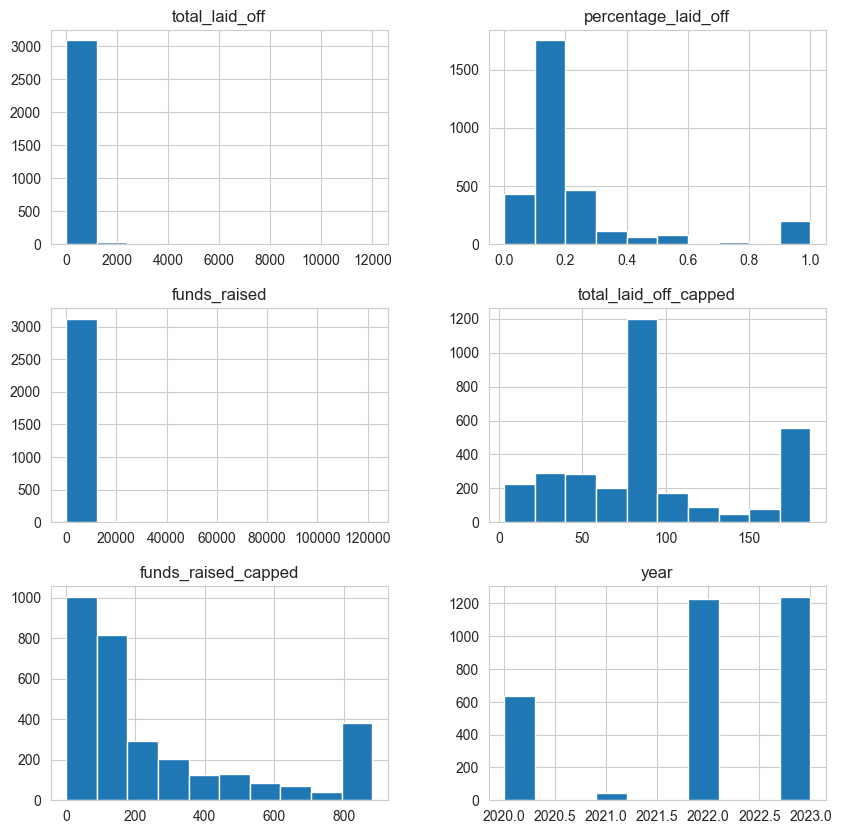

In [32]:
#plot histogram for total laid off and percentage laid off and funds raised

histogram = layoffs_data.hist(figsize=(10,10))




Data Visualization 

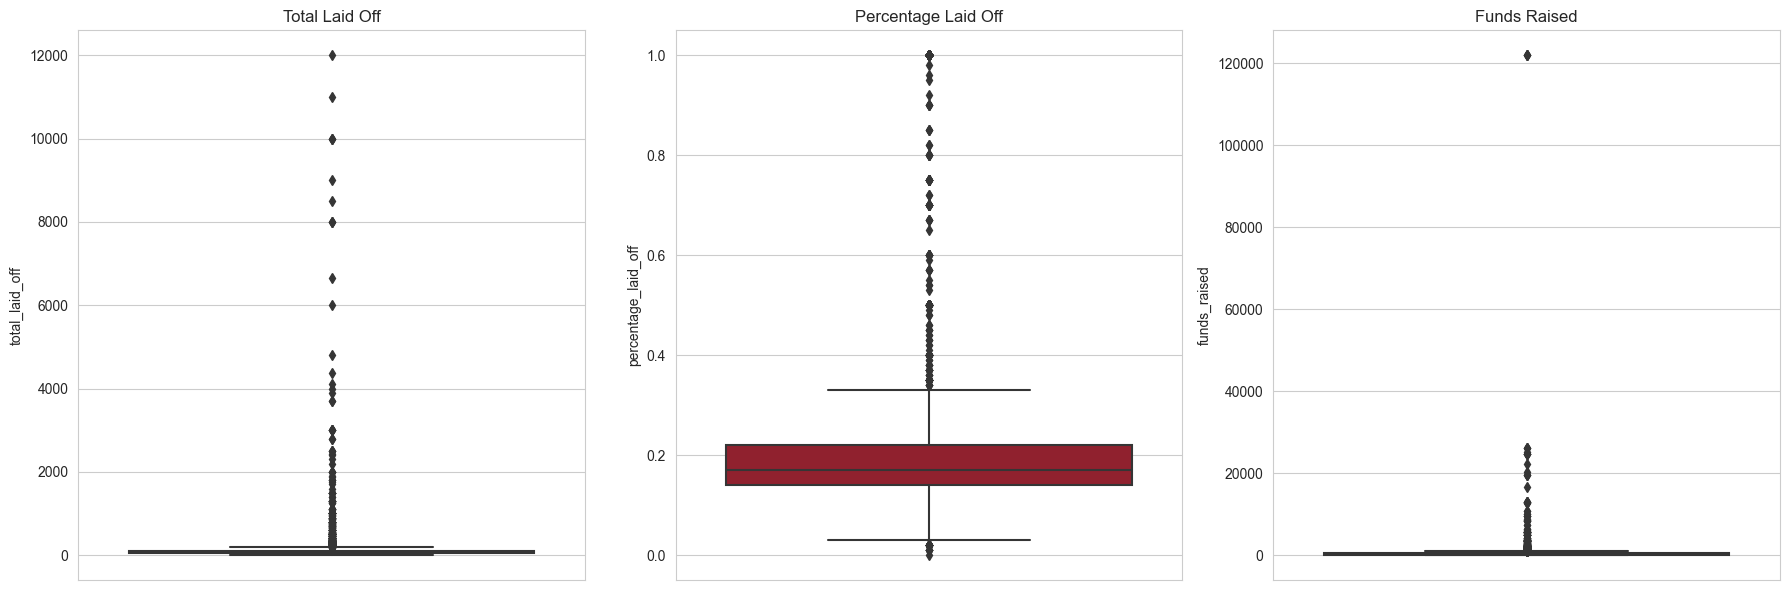

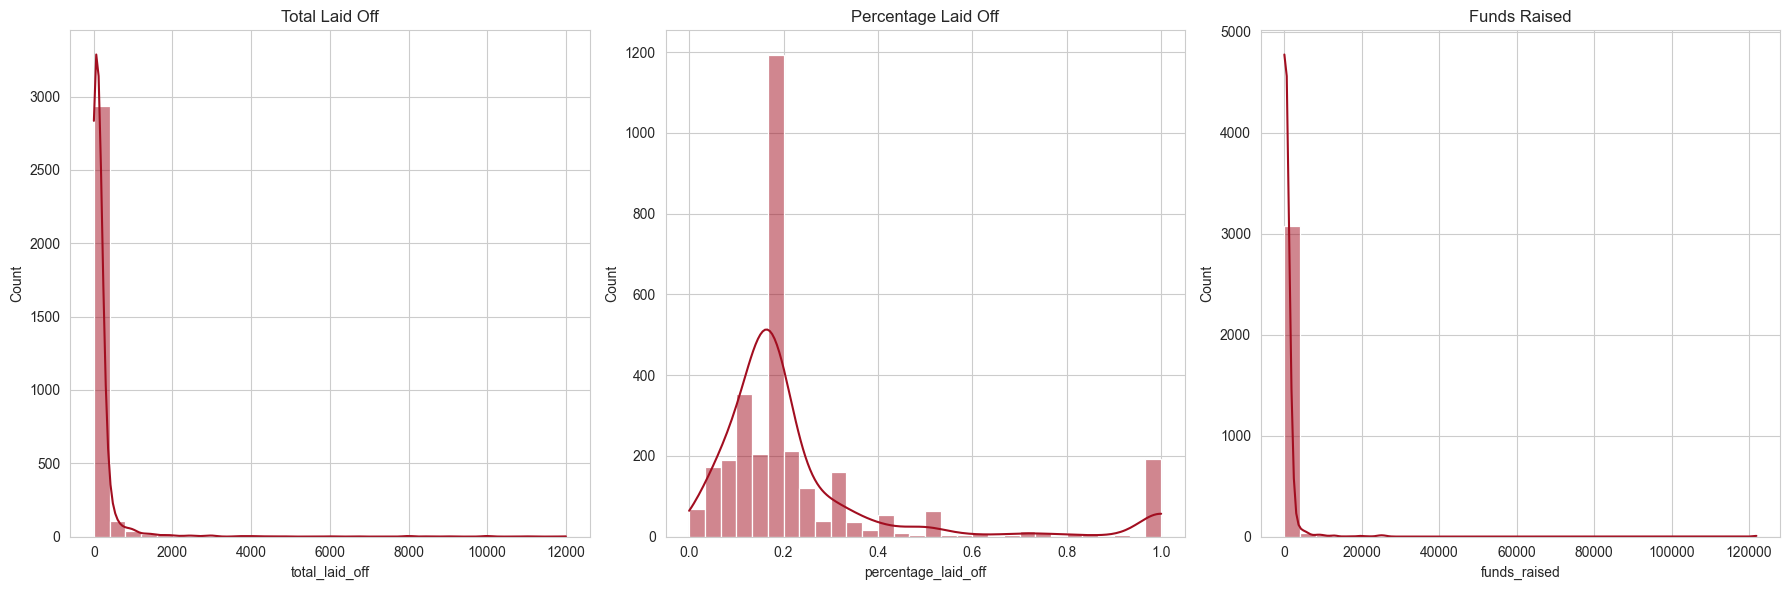

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating box plots for the numerical columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plots
sns.boxplot(ax=axes[0], data=layoffs_data, y='total_laid_off', color='#A20E20').set_title('Total Laid Off')
sns.boxplot(ax=axes[1], data=layoffs_data, y='percentage_laid_off', color='#A20E20').set_title('Percentage Laid Off')
sns.boxplot(ax=axes[2], data=layoffs_data, y='funds_raised', color='#A20E20').set_title('Funds Raised')

plt.tight_layout()
plt.show()

# Creating histograms for the numerical columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histograms
sns.histplot(ax=axes[0], data=layoffs_data, x='total_laid_off', color='#A20E20', bins=30, kde=True).set_title('Total Laid Off')
sns.histplot(ax=axes[1], data=layoffs_data, x='percentage_laid_off', color='#A20E20', bins=30, kde=True).set_title('Percentage Laid Off')
sns.histplot(ax=axes[2], data=layoffs_data, x='funds_raised', color='#A20E20', bins=30, kde=True).set_title('Funds Raised')

plt.tight_layout()
plt.show()


We can mark the presence of outliers in the data by plotting a boxplot for the Total Laid Off and Funds Raised columns.

Identifying outliers using a standard method, such as the Interquartile Range (IQR) method.

In [11]:
# Calculating IQR for 'Total Laid Off' and 'Funds Raised'
Q1_total_laid_off = layoffs_data['total_laid_off'].quantile(0.25)
Q3_total_laid_off = layoffs_data['total_laid_off'].quantile(0.75)
IQR_total_laid_off = Q3_total_laid_off - Q1_total_laid_off

Q1_funds_raised = layoffs_data['funds_raised'].quantile(0.25)
Q3_funds_raised = layoffs_data['funds_raised'].quantile(0.75)
IQR_funds_raised = Q3_funds_raised - Q1_funds_raised

# Determining the outlier bounds
lower_bound_total_laid_off = Q1_total_laid_off - 1.5 * IQR_total_laid_off
upper_bound_total_laid_off = Q3_total_laid_off + 1.5 * IQR_total_laid_off

lower_bound_funds_raised = Q1_funds_raised - 1.5 * IQR_funds_raised
upper_bound_funds_raised = Q3_funds_raised + 1.5 * IQR_funds_raised

# Identifying the outliers
outliers_total_laid_off = layoffs_data[(layoffs_data['total_laid_off'] < lower_bound_total_laid_off) | 
                                       (layoffs_data['total_laid_off'] > upper_bound_total_laid_off)]

outliers_funds_raised = layoffs_data[(layoffs_data['funds_raised'] < lower_bound_funds_raised) | 
                                     (layoffs_data['funds_raised'] > upper_bound_funds_raised)]

{
    "Total Laid Off Outlier Bounds": (lower_bound_total_laid_off, upper_bound_total_laid_off),
    "Funds Raised Outlier Bounds": (lower_bound_funds_raised, upper_bound_funds_raised),
    "Outliers in Total Laid Off": outliers_total_laid_off.shape[0],
    "Outliers in Funds Raised": outliers_funds_raised.shape[0]
}



{'Total Laid Off Outlier Bounds': (-22.375, 186.625),
 'Funds Raised Outlier Bounds': (-433.1625, 882.2975),
 'Outliers in Total Laid Off': 510,
 'Outliers in Funds Raised': 346}

Capping the outliers 

In [12]:
# Capping the outliers at the upper bound for 'Total Laid Off' and 'Funds Raised'

# Capping 'Total Laid Off'
cap_total_laid_off = upper_bound_total_laid_off
layoffs_data['total_laid_off_capped'] = layoffs_data['total_laid_off'].clip(upper=cap_total_laid_off)

# Capping 'Funds Raised'
cap_funds_raised = upper_bound_funds_raised
layoffs_data['funds_raised_capped'] = layoffs_data['funds_raised'].clip(upper=cap_funds_raised)

# Checking the effect of capping on the descriptive statistics of these columns
capped_stats_total_laid_off = layoffs_data['total_laid_off_capped'].describe()
capped_stats_funds_raised = layoffs_data['funds_raised_capped'].describe()

capped_stats_total_laid_off, capped_stats_funds_raised



(count    3148.000000
 mean       90.554876
 std        52.874897
 min         3.000000
 25%        56.000000
 50%        80.000000
 75%       108.250000
 max       186.625000
 Name: total_laid_off_capped, dtype: float64,
 count    3148.000000
 mean      270.011763
 std       281.235922
 min         0.000000
 25%        60.135000
 50%       157.950000
 75%       389.000000
 max       882.297500
 Name: funds_raised_capped, dtype: float64)

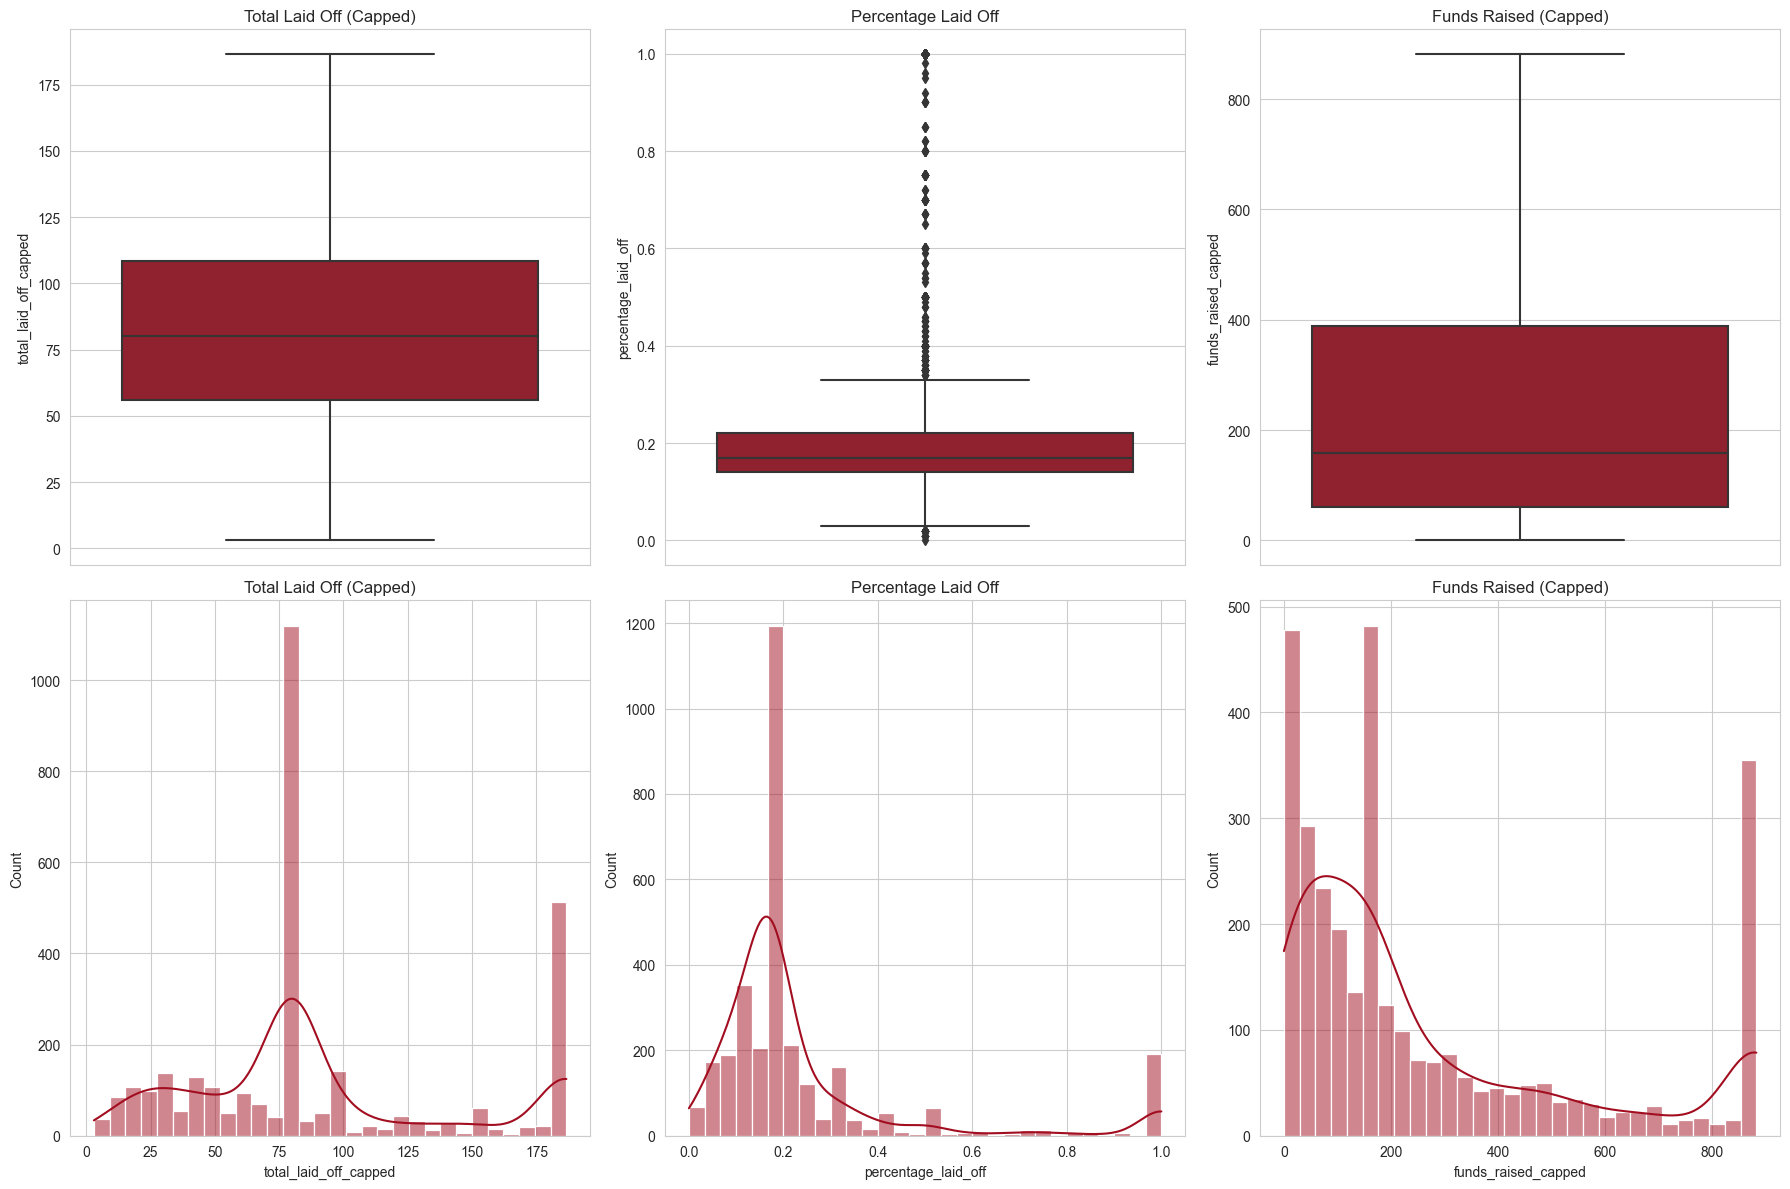

In [29]:
# Re-visualizing the data after treating outliers with the capped values

# Creating box plots and histograms for the capped numerical columns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Box plots for capped values
sns.boxplot(ax=axes[0, 0], data=layoffs_data, y='total_laid_off_capped', color='#A20E20').set_title('Total Laid Off (Capped)')
sns.boxplot(ax=axes[0, 1], data=layoffs_data, y='percentage_laid_off', color='#A20E20').set_title('Percentage Laid Off')
sns.boxplot(ax=axes[0, 2], data=layoffs_data, y='funds_raised_capped', color='#A20E20').set_title('Funds Raised (Capped)')

# Histograms for capped values
sns.histplot(ax=axes[1, 0], data=layoffs_data, x='total_laid_off_capped', color='#A20E20', bins=30, kde=True).set_title('Total Laid Off (Capped)')
sns.histplot(ax=axes[1, 1], data=layoffs_data, x='percentage_laid_off', color='#A20E20', bins=30, kde=True).set_title('Percentage Laid Off')
sns.histplot(ax=axes[1, 2], data=layoffs_data, x='funds_raised_capped', color='#A20E20', bins=30, kde=True).set_title('Funds Raised (Capped)')

plt.tight_layout()
plt.show()


Correlation Analysis 

In [14]:
# Correlation Analysis of Numerical Variables
correlation_matrix = layoffs_data[['total_laid_off_capped', 'percentage_laid_off', 'funds_raised_capped']].corr()



correlation_matrix


,total_laid_off_capped,percentage_laid_off,funds_raised_capped
total_laid_off_capped,1.000000,-0.016795,0.379046
percentage_laid_off,-0.016795,1.000000,-0.199221
funds_raised_capped,0.379046,-0.199221,1.000000


Total Laid Off (Capped) vs. Percentage Laid Off:

The correlation coefficient is approximately -0.017, indicating a very slight negative relationship. This suggests that there isn't a strong linear correlation between the number of layoffs and the percentage of the workforce laid off.

Total Laid Off (Capped) vs. Funds Raised (Capped):

The correlation coefficient is approximately 0.379, showing a moderate positive relationship. This suggests that companies with a higher number of layoffs tend to have raised more funds, though the relationship is not very strong.

Percentage Laid Off vs. Funds Raised (Capped):

The correlation coefficient is approximately -0.199, indicating a slight negative relationship. This suggests that companies that laid off a higher percentage of their workforce tend to have raised less funds, but again, the relationship is not particularly strong.

Categorical Data Analysis 

In [15]:
# Categorical Data Analysis

# Industry Analysis
industry_analysis = layoffs_data.groupby('industry').agg(
    Total_Companies=pd.NamedAgg(column='company', aggfunc='count'),
    Average_Laid_Off=pd.NamedAgg(column='total_laid_off_capped', aggfunc='mean'),
    Median_Laid_Off=pd.NamedAgg(column='total_laid_off_capped', aggfunc='median'),
    Average_Funds_Raised=pd.NamedAgg(column='funds_raised_capped', aggfunc='mean'),
    Median_Funds_Raised=pd.NamedAgg(column='funds_raised_capped', aggfunc='median')
).sort_values(by='Average_Laid_Off', ascending=False)

# Location Analysis
location_analysis = layoffs_data.groupby('location').agg(
    Total_Companies=pd.NamedAgg(column='company', aggfunc='count'),
    Average_Laid_Off=pd.NamedAgg(column='total_laid_off_capped', aggfunc='mean'),
    Median_Laid_Off=pd.NamedAgg(column='total_laid_off_capped', aggfunc='median'),
    Average_Funds_Raised=pd.NamedAgg(column='funds_raised_capped', aggfunc='mean'),
    Median_Funds_Raised=pd.NamedAgg(column='funds_raised_capped', aggfunc='median')
).sort_values(by='Average_Laid_Off', ascending=False)

# Company Stage Analysis
stage_analysis = layoffs_data.groupby('stage').agg(
    Total_Companies=pd.NamedAgg(column='company', aggfunc='count'),
    Average_Laid_Off=pd.NamedAgg(column='total_laid_off_capped', aggfunc='mean'),
    Median_Laid_Off=pd.NamedAgg(column='total_laid_off_capped', aggfunc='median'),
    Average_Funds_Raised=pd.NamedAgg(column='funds_raised_capped', aggfunc='mean'),
    Median_Funds_Raised=pd.NamedAgg(column='funds_raised_capped', aggfunc='median')
).sort_values(by='Average_Laid_Off', ascending=False)

# Country Analysis
country_analysis = layoffs_data.groupby('country').agg(
    Total_Companies=pd.NamedAgg(column='company', aggfunc='count'),
    Average_Laid_Off=pd.NamedAgg(column='total_laid_off_capped', aggfunc='mean'),
    Median_Laid_Off=pd.NamedAgg(column='total_laid_off_capped', aggfunc='median'),
    Average_Funds_Raised=pd.NamedAgg(column='funds_raised_capped', aggfunc='mean'),
    Median_Funds_Raised=pd.NamedAgg(column='funds_raised_capped', aggfunc='median')
).sort_values(by='Average_Laid_Off', ascending=False)

# Displaying the top 5 results for each analysis
industry_analysis.head(), location_analysis.head(), stage_analysis.head(), country_analysis.head()



(                Total_Companies  Average_Laid_Off  Median_Laid_Off  \
 industry                                                             
 Hardware                     37        123.902027            100.0   
 Travel                       83        110.204819             80.0   
 Fitness                      37        108.114865             80.0   
 Transportation              186        106.712366             80.0   
 Food                        184        104.893342             80.0   
 
                 Average_Funds_Raised  Median_Funds_Raised  
 industry                                                   
 Hardware                  273.926757              157.950  
 Travel                    302.732139              157.950  
 Fitness                   308.882162              200.000  
 Transportation            442.631694              340.000  
 Food                      346.574079              161.975  ,
            Total_Companies  Average_Laid_Off  Median_Laid_Off  \
 locati

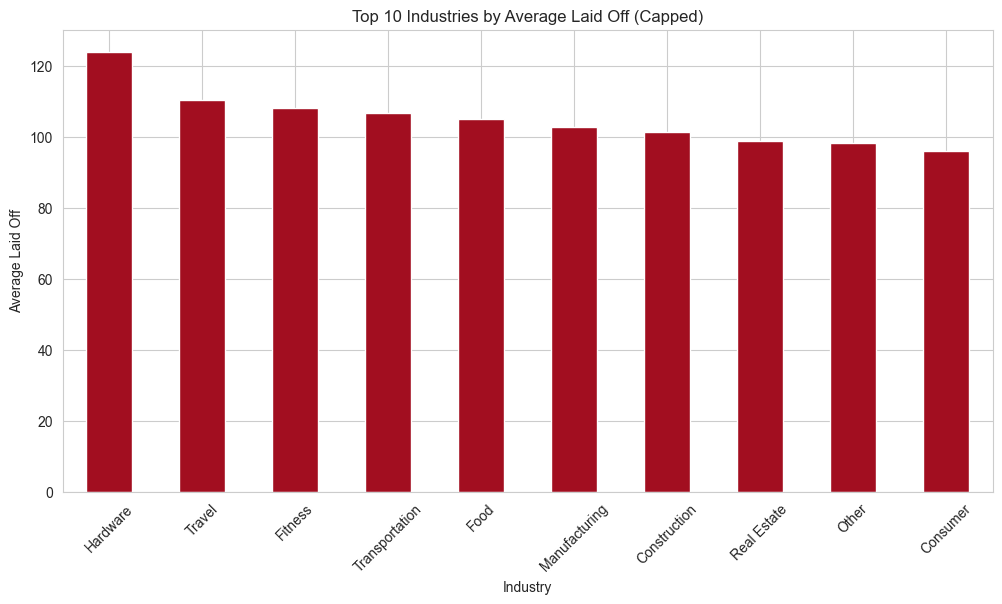

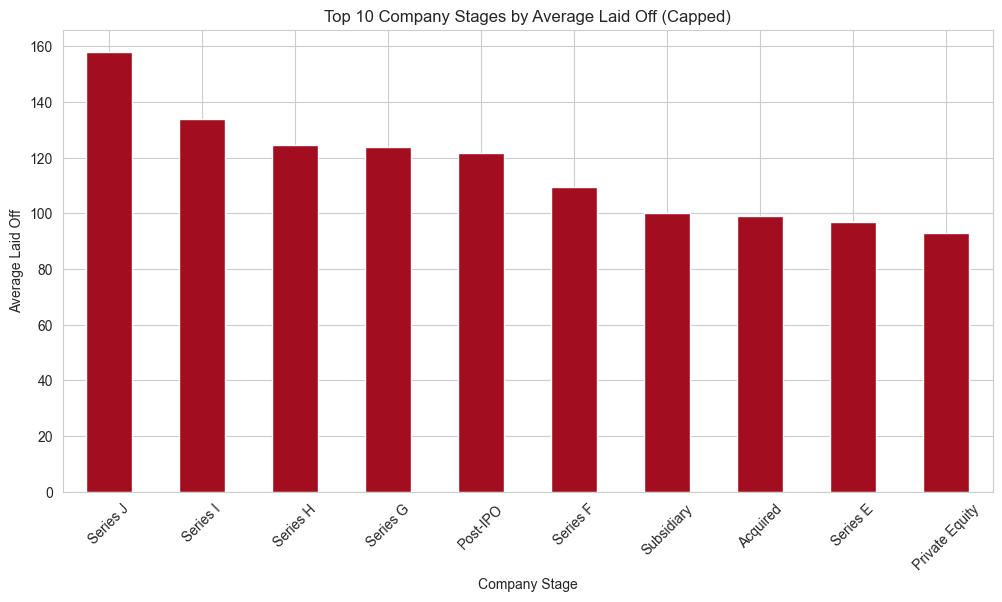

In [24]:
# Visualizing the categorical data analysis results

# Industry Analysis Visualization
industry_plot = industry_analysis.head(10)  # Top 10 industries for better visualization
fig, ax = plt.subplots(figsize=(12, 6))
industry_plot['Average_Laid_Off'].plot(kind='bar', ax=ax, color='#A20E20')
ax.set_title('Top 10 Industries by Average Laid Off (Capped)')
ax.set_xlabel('Industry')
ax.set_ylabel('Average Laid Off')
plt.xticks(rotation=45)
plt.show()

# Company Stage Analysis Visualization
stage_plot = stage_analysis.head(10)  # Top 10 stages for better visualization
fig, ax = plt.subplots(figsize=(12, 6))
stage_plot['Average_Laid_Off'].plot(kind='bar', ax=ax, color='#A20E20')
ax.set_title('Top 10 Company Stages by Average Laid Off (Capped)')
ax.set_xlabel('Company Stage')
ax.set_ylabel('Average Laid Off')
plt.xticks(rotation=45)
plt.show()

# Due to the skewed nature of location and country data (mostly single entries), they are not ideal for meaningful visualization.


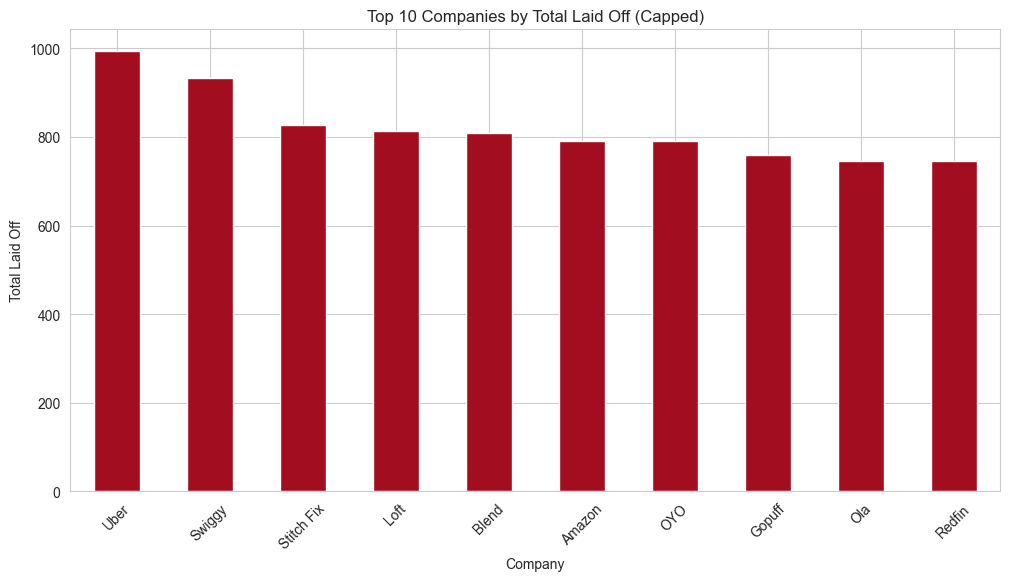

,Total_Laid_Off,Average_Laid_Off
company,,
Uber,993.125,165.520833
Swiggy,933.125,186.625000
Stitch Fix,826.500,165.300000
Loft,812.875,135.479167
Blend,809.875,161.975000
Amazon,789.875,157.975000
OYO,789.875,157.975000
Gopuff,759.875,151.975000
Ola,746.500,186.625000


In [25]:
# Analyzing top companies with the maximum layoffs

# Grouping data by company and calculating the total and average layoffs
company_layoffs = layoffs_data.groupby('company').agg(
    Total_Laid_Off=pd.NamedAgg(column='total_laid_off_capped', aggfunc='sum'),
    Average_Laid_Off=pd.NamedAgg(column='total_laid_off_capped', aggfunc='mean')
).sort_values(by='Total_Laid_Off', ascending=False)

# Visualizing the top 10 companies with the maximum layoffs
top_companies_layoffs = company_layoffs.head(10)
fig, ax = plt.subplots(figsize=(12, 6))
top_companies_layoffs['Total_Laid_Off'].plot(kind='bar', ax=ax, color='#A20E20')
ax.set_title('Top 10 Companies by Total Laid Off (Capped)')
ax.set_xlabel('Company')
ax.set_ylabel('Total Laid Off')
plt.xticks(rotation=45)
plt.show()

top_companies_layoffs



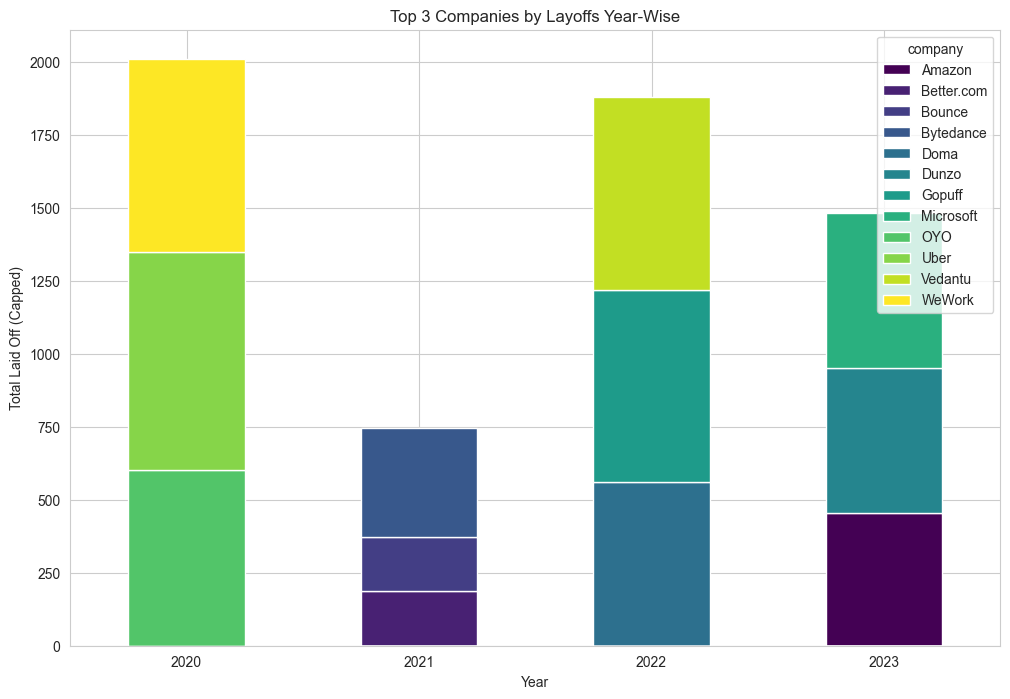

In [18]:
# Creating a stacked histogram for the top 3 companies that laid off employees year-wise


# Extracting year from the date
layoffs_data['year'] = pd.to_datetime(layoffs_data['date']).dt.year

# Grouping data by year and company, then calculating total layoffs
year_company_layoffs = layoffs_data.groupby(['year', 'company']).agg(
    Total_Laid_Off=pd.NamedAgg(column='total_laid_off_capped', aggfunc='sum')
).sort_values(['year', 'Total_Laid_Off'], ascending=[True, False])

# Finding the top 3 companies for each year
top_companies_yearly = year_company_layoffs.groupby('year').head(3).sort_index()

# Preparing the data for the histogram
top_companies_histogram_data = top_companies_yearly.reset_index().pivot(index='year', columns='company', values='Total_Laid_Off')
top_companies_histogram_data.fillna(0, inplace=True)  # Replacing NaN with 0 for companies not in top 3 in certain years

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
top_companies_histogram_data.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
ax.set_title('Top 3 Companies by Layoffs Year-Wise')
ax.set_xlabel('Year')
ax.set_ylabel('Total Laid Off (Capped)')
plt.xticks(rotation=0)
plt.show()


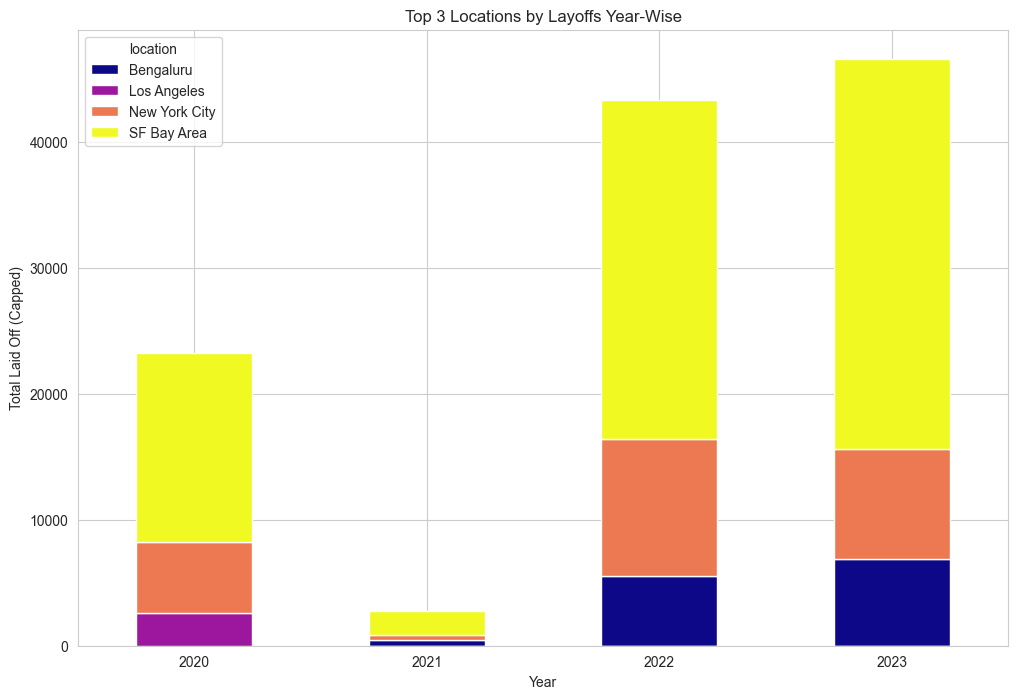

Total_Laid_Off
year location                     
2020 Los Angeles          2597.875
     New York City        5648.500
     SF Bay Area         14984.625
2021 Bengaluru             453.250
     New York City         428.625
     SF Bay Area          1904.500
2022 Bengaluru            5510.000
     New York City       10903.375
     SF Bay Area         26888.375
2023 Bengaluru            6846.125
     New York City        8771.000
     SF Bay Area         30926.125

In [19]:
# Analyzing top 3 locations where most layoffs happened year-wise

# Grouping data by year and location, then calculating total layoffs
year_location_layoffs = layoffs_data.groupby(['year', 'location']).agg(
    Total_Laid_Off=pd.NamedAgg(column='total_laid_off_capped', aggfunc='sum')
).sort_values(['year', 'Total_Laid_Off'], ascending=[True, False])

# Finding the top 3 locations for each year
top_locations_yearly = year_location_layoffs.groupby('year').head(3).sort_index()

# Preparing data for the histogram
top_locations_histogram_data = top_locations_yearly.reset_index().pivot(index='year', columns='location', values='Total_Laid_Off')
top_locations_histogram_data.fillna(0, inplace=True)  # Replacing NaN with 0 for locations not in top 3 in certain years

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
top_locations_histogram_data.plot(kind='bar', stacked=True, ax=ax, colormap='plasma')
ax.set_title('Top 3 Locations by Layoffs Year-Wise')
ax.set_xlabel('Year')
ax.set_ylabel('Total Laid Off (Capped)')
plt.xticks(rotation=0)
plt.show()

top_locations_yearly



Insights:
The SF Bay Area consistently appears as the location with the highest layoffs each year, with a significant increase in 2022 and 2023.
New York City and Bengaluru also frequently appear among the top 3 locations, indicating they are key areas for layoffs.

In [20]:
pip install nbformat


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
pip install --upgrade nbformat



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import pandas as pd
import plotly.express as px

# Assuming your DataFrame is named 'layoffs_data'
# Ensure your data has 'country' and 'total_laid_off_capped' columns

# If your dataset doesn't include ISO country codes, you will need to add them.
# For example, you can create a mapping dictionary or use a library to convert country names to ISO codes.

# Here, we use 'total_laid_off_capped' as an example for the visualization.
# Grouping the data by country and summing the layoffs
grouped_data = layoffs_data.groupby('country')['total_laid_off_capped'].sum().reset_index()

# Creating the 3D globe visualization
fig = px.scatter_geo(grouped_data,
                     locations="country",  # Assuming this column has ISO country codes
                     size="total_laid_off_capped",  # Size of points will be based on total layoffs
                     projection="natural earth",  # 3D globe projection
                     title="Global Layoffs Visualization")

# Show the plot
fig.show()

# Note: This code should be adapted based on the exact structure of your dataset.
# If your 'country' column doesn't have ISO codes, you'll need to add a column with the corresponding ISO codes.
# This code should be run in a Jupyter notebook or similar environment that can render Plotly visualizations.


In [23]:
import pandas as pd
import plotly.graph_objects as go

# Assuming you have a DataFrame named 'df' with 'iso_alpha' codes and 'total_laid_off' values
# Replace 'iso_alpha' with your ISO country code column
# Replace 'total_laid_off' with the column you want to visualize (e.g., 'total_laid_off_capped')
metricscale1=[[0, 'rgb(102,194,165)'], [0.05, 'rgb(102,194,165)'], 
              [0.15, 'rgb(171,221,164)'], [0.2, 'rgb(230,245,152)'], 
              [0.25, 'rgb(255,255,191)'], [0.35, 'rgb(254,224,139)'], 
              [0.45, 'rgb(253,174,97)'], [0.55, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]

fig = go.Figure(data=go.Choropleth(
    locations=df['country'],  # ISO-3166 country codes
    z=df['total_laid_off'].astype(float),  # Data to be color-coded
    text=df['country'],  # Country names
    colorscale='Blues',  # Color scale
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Total Laid Off',
))

fig.update_layout(
    title_text='Total Laid Off by Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='orthographic'
    ),
    annotations=[dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: Your Data Source',
        showarrow=False
    )]
)

fig.show()
